# Pymaceuticals Inc.
---

### Analysis

In this study, 249 mice who were identified with SCC tumors received treatment with a range of drug regimens. This study's main purpose was to compare the performance of Capomulin against other treatment regimens. This study was performed on relatively even amounts of male and female mice that varied in age and weight. Each mice's tumor volume was monitored over 20 days. The study has shown at the end of the 20 days, Capomulin is an effective treatment for SCC tumor reduction, however it is not as effective as Ramicane.
 

In [145]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mice_data = mouse_metadata.merge(study_results, on="Mouse ID",how="right")
# Display the data table for preview
mice_data.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [146]:
# Checking the number of mice.
mice_count = len(mice_data["Mouse ID"].unique())
mice_count

249

In [147]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice_df = mice_data[mice_data.duplicated(subset=["Mouse ID","Timepoint"], keep=False)]
duplicate_mice = pd.unique(duplicate_mice_df["Mouse ID"])
duplicate_mice

array(['g989'], dtype=object)

In [148]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mice_data = mice_data.loc[mice_data["Mouse ID"] == duplicate_mice[0]]
duplicate_mice_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [149]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mice_data.drop(index=duplicate_mice_data.index)
clean_df.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [150]:
# Checking the number of mice in the clean DataFrame.
mice_count = len(clean_df["Mouse ID"].unique())
mice_count

248

## Summary Statistics

In [151]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
grouped = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"]
summary_stats = pd.DataFrame({
   "Mean Tumor Volume": grouped.mean(),
   "Median Tumor Volume": grouped.median(),
   "Tumor Volume Variance": grouped.var(),
   "Tumor Volume Std. Dev": grouped.std(),
   "Tumor Volume Std. Err.": grouped.sem()
})
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [152]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
stats = grouped.agg(
   mean='mean',
   median='median',
   var='var',
   std = 'std',
   sem= sem
)
stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

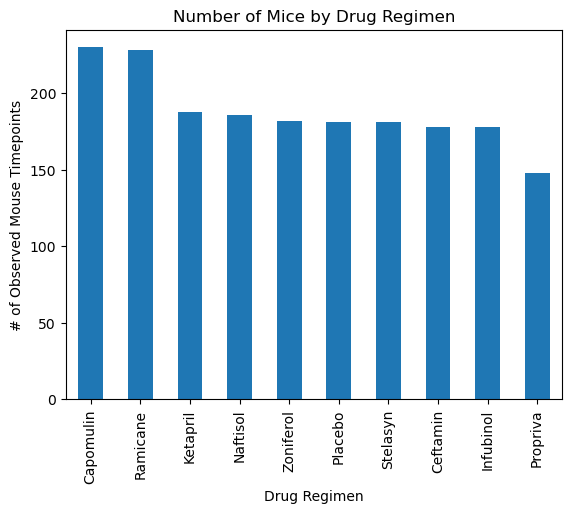

In [153]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
group_drug_regimen = clean_df.groupby("Drug Regimen")["Mouse ID"].count().sort_values(ascending=False)
figure1 = group_drug_regimen.plot(kind="bar",ylabel="# of Observed Mouse Timepoints", title="Number of Mice by Drug Regimen")

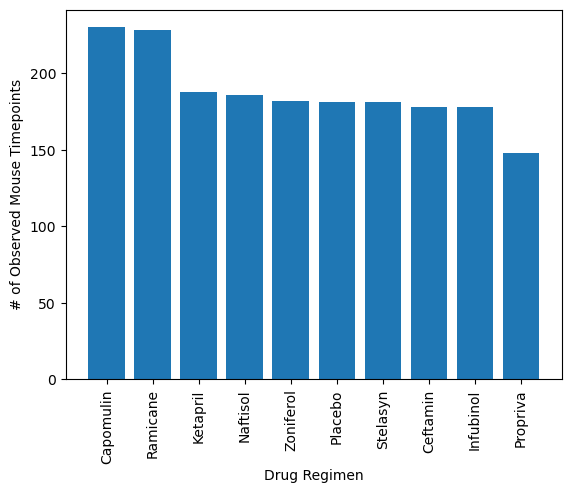

In [154]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
xlabels = group_drug_regimen.index.tolist()
x_axis = np.arange(len(xlabels))
tick_locations = [x for x in x_axis]
plt.xticks(tick_locations,xlabels, rotation=90)
plt.xticks()
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.bar(x_axis, group_drug_regimen.values)
plt.show()


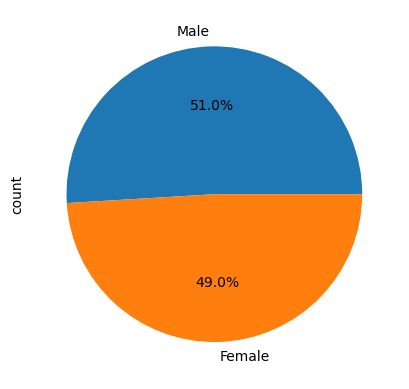

In [155]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
group_by_gender = clean_df.groupby("Sex")["Mouse ID"].count().sort_values(ascending=False)
group_by_gender
# Make the pie chart
pandas_pie_chart = group_by_gender.plot(kind="pie", y="count", ylabel="count", autopct='%.1f%%')


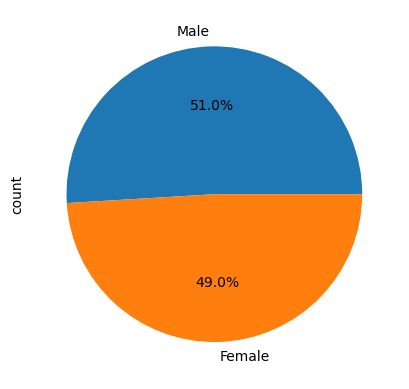

In [156]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
group_by_gender = clean_df.groupby("Sex")["Mouse ID"].count().sort_values(ascending=False)
labels = group_by_gender.index.tolist()

# Make the pie chart
plt.ylabel("count")
plt.pie(group_by_gender.values, labels=labels,autopct='%1.1f%%')
plt.show()

## Quartiles, Outliers and Boxplots

In [157]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_keep = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
four_treatments = clean_df[clean_df['Drug Regimen'].isin(drug_keep)].reset_index()
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = pd.DataFrame(four_treatments.groupby("Mouse ID")["Timepoint"].max())

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_volume_last_df = pd.merge(
    four_treatments, 
    last_timepoint_df,
    on=["Mouse ID", "Timepoint"],
    how="right")
tumor_volume_last_df


,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,1804,a203,Infubinol,Female,20,23,45,67.973419,2
1,1786,a251,Infubinol,Female,21,25,45,65.525743,1
2,1856,a275,Ceftamin,Female,20,28,45,62.999356,3
3,1773,a411,Ramicane,Male,3,22,45,38.407618,1
4,1836,a444,Ramicane,Female,10,25,45,43.047543,0
...,...,...,...,...,...,...,...,...,...
95,1767,y769,Ceftamin,Female,6,27,45,68.594745,4
96,1797,y793,Capomulin,Male,17,17,45,31.896238,2
97,1766,y865,Ceftamin,Male,23,26,45,64.729837,3
98,1799,z578,Ramicane,Male,11,16,45,30.638696,0


In [158]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = tumor_volume_last_df["Drug Regimen"].unique()
treatments
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for i in range(len(treatments)):
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_mice = tumor_volume_last_df[tumor_volume_last_df["Drug Regimen"] == treatments[i]]
    
    # add subset
    tumor_vol_data.append(treatment_mice["Tumor Volume (mm3)"].sort_values())
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol_data[i].quantile([.25,.5,.75])
    iqr = quartiles[0.75] - quartiles[.25]
    lower_bound = quartiles[.25] - (1.5*iqr)
    upper_bound = quartiles[.75] + (1.5*iqr)
    outliers = []
    for value in tumor_vol_data[i]:
        if value < lower_bound or value > upper_bound:
            outliers.append(value)
    print(f"{treatments[i]}'s potential outliers: {outliers}")

Infubinol's potential outliers: [36.3213458]
Ceftamin's potential outliers: []
Ramicane's potential outliers: []
Capomulin's potential outliers: []


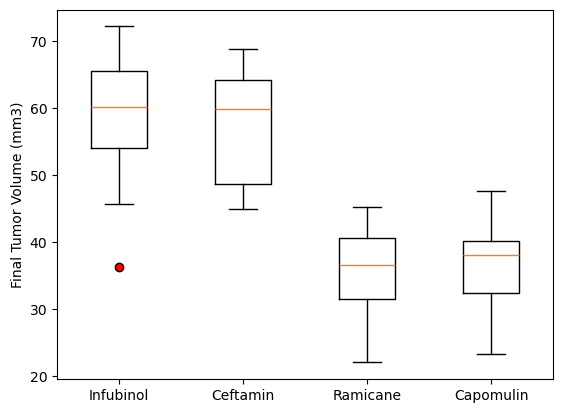

In [159]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.ylabel("Final Tumor Volume (mm3)")
x_axis = np.arange(len(treatments))
tick_locations = [value+1 for value in x_axis]
labels = treatments.tolist()
plt.boxplot(tumor_vol_data, flierprops=dict(markerfacecolor='red'))
plt.xticks(tick_locations, labels)
plt.xticks()
plt.show()

## Line and Scatter Plots

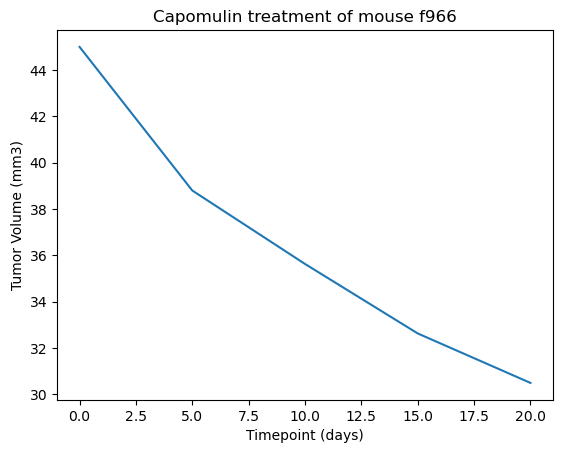

In [160]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mice_with_capomulin_df = four_treatments.loc[(four_treatments["Mouse ID"] == 'f966') & (four_treatments["Drug Regimen"] == 'Capomulin')]
x_axis = mice_with_capomulin_df["Timepoint"]
y_axis = mice_with_capomulin_df["Tumor Volume (mm3)"]
plt.plot(x_axis, y_axis)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse f966")
plt.show()

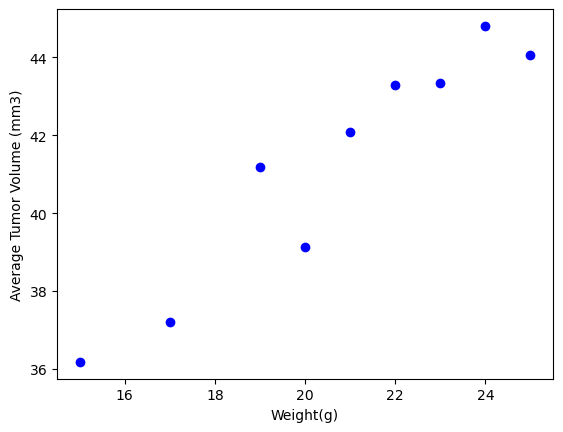

In [161]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
avg_tumor_capomulin = clean_df[clean_df["Drug Regimen"] == 'Capomulin']
avg_weight = avg_tumor_capomulin.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()
x_axis = avg_weight.index
y_axis = avg_weight.values
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue")
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.95


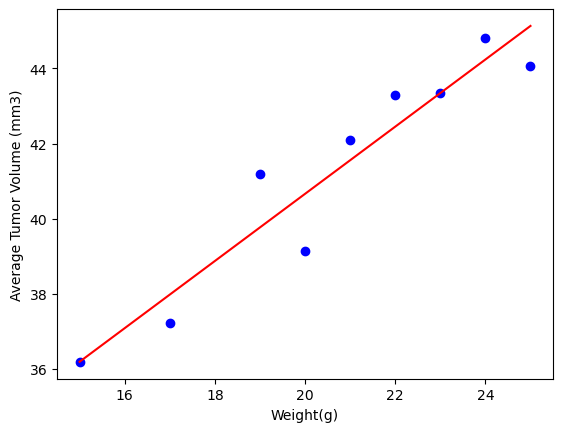

In [162]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
p_slope, p_int, p_r, p_p, p_std_err = st.linregress(x_axis, y_axis)
print(f"The correlation between mouse weight and the average tumor volume is {round(p_r,2)}")
p_fit = p_slope * x_axis + p_int
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue")
plt.plot(x_axis, p_fit, color="red")
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()